<a href="https://colab.research.google.com/github/wei-enwang/space-ham/blob/main/main_driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import nltk
from nltk.corpus import words
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils import data
from preprocess import WholeData, BalancedData

import models
import utils

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/weinwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('words')

device = "cuda" if torch.cuda.is_available() else "cpu"
assert device == "cuda"   # use gpu whenever you can!

seed = 32
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

[nltk_data] Downloading package words to /home/weinwang/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
plot_yes = True

# use one dataset for now
train_data_dir = "./data/enron1/"
test_data_dir = "./data/enron2/"
output_dir = "./output/"

# hyperparameters
batch_size = 64
hidden_size = 128
num_layer = 3
dropout = 0.5
learning_rate = 1e-4
epochs = 20
max_len = 100

In [4]:
vocab = set([str.lower() for str in words.words()])

# train_dataset = WholeData(train_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
# test_dataset = WholeData(test_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
# Balanced dataset
train_dataset = BalancedData(train_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
test_dataset = BalancedData(test_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)

w2idx = train_dataset.src_v2id

embed = utils.load_pretrained_vectors(w2idx, "fastText/crawl-300d-2M.vec")
embed = torch.tensor(embed)

Number of ham emails: 1500, spam emails: 1500
Number of ham emails: 1496, spam emails: 1496
Loading pretrained vectors...
234378


0it [00:00, ?it/s]

There are 75835 / 234379 pretrained vectors found.


In [5]:
train_dataloader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                                   num_workers=8, pin_memory=True)
test_dataloader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, 
                                  num_workers=8, pin_memory=True, drop_last=True)


In [6]:
model = models.spam_lstm(hidden_size=hidden_size, pretrained_embedding=embed, dropout=dropout).to(device)
loss_fn = nn.BCEWithLogitsLoss().to(device)
opt = Adam(model.parameters(), lr=learning_rate)

Using pretrained vectors...


  0%|          | 0/20 [00:00<?, ?it/s]/home/weinwang/anaconda3/envs/nlp/lib/python3.6/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
  5%|▌         | 1/20 [00:04<01:18,  4.15s/it]

Epoch 0
-------------------------------
Training loss: 0.693421, avg accuracy: 0.499763
Testing loss: 0.693047, avg accuracy: 0.500000


 10%|█         | 2/20 [00:08<01:14,  4.13s/it]

Epoch 1
-------------------------------
Training loss: 0.692528, avg accuracy: 0.522084
Testing loss: 0.692461, avg accuracy: 0.608356


 15%|█▌        | 3/20 [00:12<01:10,  4.13s/it]

Epoch 2
-------------------------------
Training loss: 0.688785, avg accuracy: 0.564495
Testing loss: 0.684536, avg accuracy: 0.604620


 20%|██        | 4/20 [00:16<01:06,  4.13s/it]

Epoch 3
-------------------------------
Training loss: 0.511756, avg accuracy: 0.754322
Testing loss: 0.634651, avg accuracy: 0.806726


 25%|██▌       | 5/20 [00:20<01:01,  4.13s/it]

Epoch 4
-------------------------------
Training loss: 0.355593, avg accuracy: 0.875142
Testing loss: 0.465406, avg accuracy: 0.829823


 30%|███       | 6/20 [00:24<00:57,  4.14s/it]

Epoch 5
-------------------------------
Training loss: 0.333845, avg accuracy: 0.876995
Testing loss: 0.473070, avg accuracy: 0.835938


 35%|███▌      | 7/20 [00:28<00:53,  4.14s/it]

Epoch 6
-------------------------------
Training loss: 0.324962, avg accuracy: 0.879132
Testing loss: 0.443162, avg accuracy: 0.835598


 40%|████      | 8/20 [00:33<00:49,  4.14s/it]

Epoch 7
-------------------------------
Training loss: 0.301813, avg accuracy: 0.895232
Testing loss: 0.743437, avg accuracy: 0.783288


 45%|████▌     | 9/20 [00:37<00:45,  4.14s/it]

Epoch 8
-------------------------------
Training loss: 0.300633, avg accuracy: 0.906108
Testing loss: 0.410906, avg accuracy: 0.857677


 50%|█████     | 10/20 [00:41<00:41,  4.14s/it]

Epoch 9
-------------------------------
Training loss: 0.197327, avg accuracy: 0.947141
Testing loss: 0.403097, avg accuracy: 0.868207


 55%|█████▌    | 11/20 [00:45<00:37,  4.14s/it]

Epoch 10
-------------------------------
Training loss: 0.210181, avg accuracy: 0.938117
Testing loss: 0.393087, avg accuracy: 0.870924


 60%|██████    | 12/20 [00:49<00:33,  4.14s/it]

Epoch 11
-------------------------------
Training loss: 0.152154, avg accuracy: 0.962528
Testing loss: 0.452940, avg accuracy: 0.864470


 65%|██████▌   | 13/20 [00:53<00:28,  4.14s/it]

Epoch 12
-------------------------------
Training loss: 0.160404, avg accuracy: 0.958587
Testing loss: 0.379221, avg accuracy: 0.895041


 70%|███████   | 14/20 [00:57<00:24,  4.14s/it]

Epoch 13
-------------------------------
Training loss: 0.171182, avg accuracy: 0.957447
Testing loss: 0.388816, avg accuracy: 0.886549


 75%|███████▌  | 15/20 [01:02<00:20,  4.14s/it]

Epoch 14
-------------------------------
Training loss: 0.133921, avg accuracy: 0.968655
Testing loss: 0.381289, avg accuracy: 0.890625


 80%|████████  | 16/20 [01:06<00:16,  4.15s/it]

Epoch 15
-------------------------------
Training loss: 0.116075, avg accuracy: 0.973024
Testing loss: 0.392181, avg accuracy: 0.892323


 85%|████████▌ | 17/20 [01:10<00:12,  4.15s/it]

Epoch 16
-------------------------------
Training loss: 0.165999, avg accuracy: 0.960391
Testing loss: 0.432174, avg accuracy: 0.888587


 90%|█████████ | 18/20 [01:14<00:08,  4.15s/it]

Epoch 17
-------------------------------
Training loss: 0.130368, avg accuracy: 0.970080
Testing loss: 0.361545, avg accuracy: 0.903872


 95%|█████████▌| 19/20 [01:18<00:04,  4.15s/it]

Epoch 18
-------------------------------
Training loss: 0.102963, avg accuracy: 0.977679
Testing loss: 0.474965, avg accuracy: 0.875679


100%|██████████| 20/20 [01:22<00:00,  4.14s/it]

Epoch 19
-------------------------------
Training loss: 0.100429, avg accuracy: 0.976729
Testing loss: 0.367808, avg accuracy: 0.898438


Final testing loss: 0.372750, testing accuracy: 0.897079
F1 score: 0.890257 Precision: 0.953452, Recall: 0.834918


(0.1004292989110059, 0.3727503444837487)

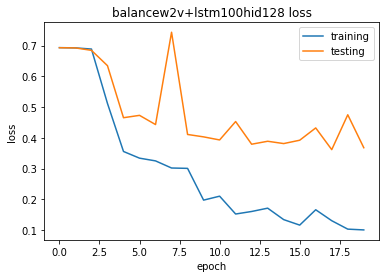

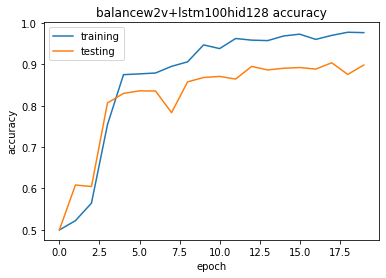

In [7]:
utils.train_test_scheme(train_dataloader, test_dataloader, model, loss_fn, opt, 
                        task_name="balancew2v+lstm100hid128", epochs=epochs, 
                        vis=plot_yes, print_every=1, img_dir=output_dir)



In [8]:
torch.save(model.state_dict(), output_dir+"balancew2v_lstm100hid128.pt")

In [16]:
test_message = "Subject: Health attestation submitted - Wei-En Wang \
Thank you for completing the Daily Health Attestation. You are cleared to enter your approved \
MIT building(s) East Campus, Learning Spaces through the designated entrance access points \
(http://covidapps.mit.edu/sites/default/files/documents/MITCampusAccessMap.pdf) for a \
24-hour period starting from the time you complete the Daily Health Attestation form. \
A summary of campus access can be found here - https://covidapps.mit.edu/resources. \
You must also follow the guidelines contained in the Acknowledgement form, including for example, \
wearing a mask/face covering, washing or disinfecting hands frequently, and practicing physical distancing.\
Note: While daily access is granted for a 24-hour period, you should arrive at and depart \
from your lab at the time(s) directed by your PI or supervisor. \
You will need to complete the Daily Health Attestation for future access to Campus after today’s pass expires. This can be done on your computer or via the Atlas App available on the Apple App Store or the Google Play Store"

In [17]:
from preprocess import clean_string
context = clean_string(test_message)
sent_id = [0 for _ in range(max_len)]
for i, w in enumerate(context):
    if i >= max_len:
        break
    if w not in train_dataset.vocab:
        w = '<unk>'
    sent_id[i] = train_dataset.src_v2id[w]
sent_id = torch.unsqueeze(torch.tensor(sent_id),dim=0).to(device)

In [18]:
model.eval()
print(f"Email message: \"{test_message}\"")
with torch.no_grad():
    pred = nn.Sigmoid()(model(sent_id))
    pred = torch.squeeze(pred)

    if pred > 0.5:
        print("This is a ham email message.")
    else:
        print("This is a spam email message.")

print(f"The probability of this email being a spam is {(1-pred)*100:.1f}%.")

Email message: "Subject: Health attestation submitted - Wei-En Wang Thank you for completing the Daily Health Attestation. You are cleared to enter your approved MIT building(s) East Campus, Learning Spaces through the designated entrance access points (http://covidapps.mit.edu/sites/default/files/documents/MITCampusAccessMap.pdf) for a 24-hour period starting from the time you complete the Daily Health Attestation form. A summary of campus access can be found here - https://covidapps.mit.edu/resources. You must also follow the guidelines contained in the Acknowledgement form, including for example, wearing a mask/face covering, washing or disinfecting hands frequently, and practicing physical distancing.Note: While daily access is granted for a 24-hour period, you should arrive at and depart from your lab at the time(s) directed by your PI or supervisor. You will need to complete the Daily Health Attestation for future access to Campus after today’s pass expires. This can be done on y